# Q14
Tree Based Models - Q14 - 20/July

The infamous house price prediction problem. :

07_House_Price_Data.xlsx contains house price data along with few relevant variables. 
https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

    Train a decision tree classifier to predict the house price based on other variables present in the dataset. 
    Use a 5 fold CV for scoring.  
    Which variables do you think are categorical? 
    How good is the prediction?

In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("07_House_Price_Data.xlsx")
df.head(2)

,Home No,Nbhd,Offers,SqFt,Brick,Bedrooms,Bathrooms,Price
0,1,0,2,1790,0,2,2,114300
1,2,0,3,2030,0,4,2,114200


In [7]:
# Treating Nbhd and Brick as categorical variables
cat_vars = ['Nbhd', 'Brick']
num_vars = ['Offers', 'SqFt', 'Bedrooms', 'Bathrooms']
df = pd.get_dummies(df, columns=cat_vars, prefix_sep="_")
df.head(2)

,Home No,Offers,SqFt,Bedrooms,Bathrooms,Price,Nbhd_0,Nbhd_1,Brick_0,Brick_1
0,1,2,1790,2,2,114300,1,0,1,0
1,2,3,2030,4,2,114200,1,0,1,0


In [9]:
dummy_vars = ['Nbhd_0', 'Nbhd_1', 'Brick_0', 'Brick_1']
x_vars = dummy_vars + num_vars
y_var = 'Price'

In [10]:
# Without splitting data into training and test
# Estimate the performance of model using cross-validation
tune_parm_space = {'min_samples_split':range(1, 20),
                   'max_depth':range(1, 20),
                   'min_samples_leaf':range(1, 20)
                  }

tree_reg_model = DecisionTreeRegressor(random_state=1)
tree_reg_model_cv_1 = GridSearchCV(tree_reg_model, tune_parm_space, cv=5)
tree_reg_model_cv_1.fit(df[x_vars], df[y_var])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 20)})

In [11]:
tree_reg_model_cv_1.best_params_

{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [12]:
model_sq = tree_reg_model_cv_1.best_score_
rmse = mean_squared_error(df[y_var], tree_reg_model_cv_1.predict(df[x_vars]), squared=False)

print(f"Using Grid Search cv and doing 5 fold cross-validation, decision tree performs as below:")
print(f"Model R square is {np.round(model_sq * 100, 2)}")
print(f"Model RMSE is     {np.round(rmse, 2)}")

Using Grid Search cv and doing 5 fold cross-validation, decision tree performs as below:
Model R square is 69.02
Model RMSE is     10249.04


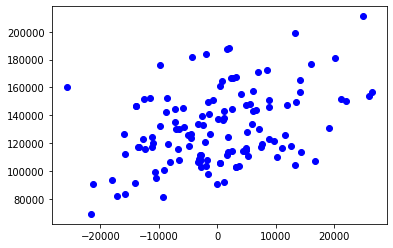

In [34]:
pred = tree_reg_model_cv_1.predict(df[x_vars])
residual = df[y_var] - pred
#df[y_var].describe()

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(residual, df[y_var], c='b');

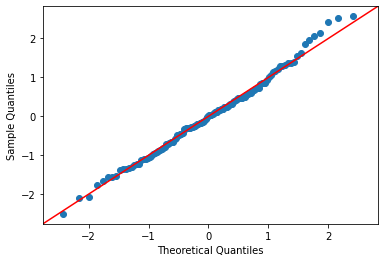

In [32]:
mean_of_residual = np.mean(residual.values) 
std_of_residual = np.std(residual.values)
std_residual = (residual.values - mean_of_residual) / std_of_residual
import statsmodels.api as sm
sm.qqplot(std_residual, line ='45');

# Answers:
    1. Train a decision tree classifier to predict the house price based on other variables present in the dataset.Use a 
       5 fold CV for scoring. 
       Implemented in the notebook
    2. Which variables do you think are categorical? 
       The categorical variables are `Nbhd` and `Brick`
    3. How good is the prediction? 
       The R-square of the model is 69%, and model RMSE is 10249, which seems ok considering the scale of target variable. The residual plot and qq-plot, seems to be ok. Overall model is performing decent.
       